<a href="https://colab.research.google.com/github/felipecardosobcc/Atividade01---Matem-tica-Computacional/blob/main/Atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 0 - Uso do Jupyter, Git, Matplotlib e Transformações Lineares**

## Descrição da Tarefa:

Implemente, utilizando uma ferramenta do tipo Jupyter (ex.: Jupyter Notebook, JupyterLab, Google Colab), um notebook que demonstre:



1.   Rotação horária de 90° e shear (cisalhamento) em x, diferentes dos exemplos apresentados em sala.
2.   A obtenção das matrizes de transformação a partir dos vetores unitários (bases) — mostrando o processo numericamente e graficamente com o Matplotlib.
3. A aplicação passo a passo dessas matrizes a dois vetores arbitrários, com apresentação de resultados numéricos e gráficos no Matplotlib.

Requisitos obrigatórios:



*   Uso de ferramenta Jupyter-like (Jupyter Notebook, Colab, etc.).
*   Versionamento e entrega via Git (enviar o link do repositório).






In [26]:
# pip install matplotlib
# pip install numpy

In [ ]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np

# Vetor
vetor = np.array([6, 8])

# Plot
plt.figure() # Iniciando o gráfico
plt.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy', scale=1, color='b') # Desenhando o vetor
plt.xlim(0, 10) # Definindo os limites do eixo X
plt.ylim(0, 10) # Definindo os limites do eixo Y
plt.grid(True) # Ativando as grades do gráfico
ax = plt.gca()  # pega os eixos atuais
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.text(3.9, 0.1, 'x', fontsize=12, fontweight='bold')
plt.text(0.1, 3.9, 'y', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.show() # Plotando o gráfico

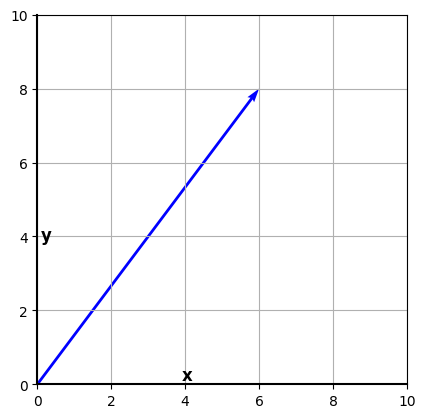

## **Descobrindo o Quadrante do Vetor**

Definindo uma função quadrante( ) que recebe um vetor e retorna o quadrante em que o vetor pertence.



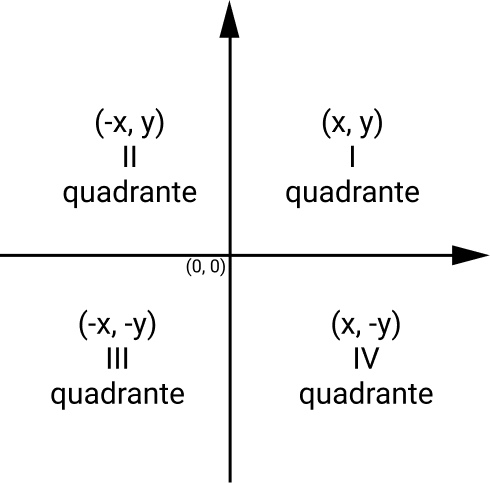

In [32]:
def quadrante(vector):
  if vector[0] > 0 and vector[1] > 0:
    return '1'
  elif vector[0] < 0 and vector[1] > 0:
    return '2'
  elif vector[0] < 0 and vector[1] < 0:
    return '3'
  elif vector[0] > 0 and vector[1] < 0:
    return '4'

## **Generalizando a rotação**

Com base no quadrante do vetor, a função altera o sinal do componente específico para a sua rotação em 90 graus no sentido horário.

In [23]:
def rotacao90(vetor, quadrante):
  R = vetor # Vetor rotacionado
  match quadrante:
    case '1':
      R[1] = vetor[1] * (-1)
    case '2':
      R[0] = vetor[0] * (-1)
    case '3':
      R[1] = vetor[1] * (-1)
    case '4':
      R[0] = vetor[0] * (-1)
  return R

In [ ]:
#vetor = np.array([6, 8])

vetor_quadrante = quadrante(vetor)
R = rotacao90(vetor, vetor_quadrante)

plt.figure()
plt.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-6, 6)
plt.ylim(-8, 8)
plt.grid(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.text(3.9, 0.1, 'x', fontsize=12, fontweight='bold')
plt.text(0.1, 3.9, 'y', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

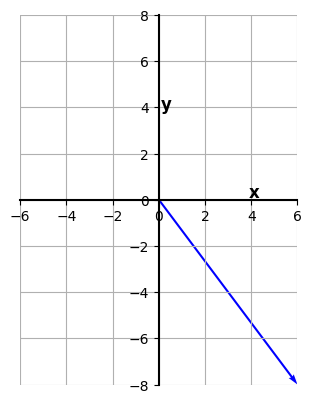